In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
sns.set_style('whitegrid')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
# Load the data
raw_house = pd.read_csv('./housing.csv', index_col=0)
raw_house = raw_house[raw_house.MSZoning.isin(['FV','RH', 'RL', 'RM', 'RP'])].copy()
house = raw_house[raw_house.YrSold < 2010].copy()
#reserve for test the model
house_test = raw_house[raw_house.YrSold == 2010].copy()

## 1. Estimating the value of homes from fixed characteristics

In [3]:
house

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900


In [4]:
house.columns

Index([u'MSSubClass', u'MSZoning', u'LotFrontage', u'LotArea', u'Street',
       u'Alley', u'LotShape', u'LandContour', u'Utilities', u'LotConfig',
       u'LandSlope', u'Neighborhood', u'Condition1', u'Condition2',
       u'BldgType', u'HouseStyle', u'OverallQual', u'OverallCond',
       u'YearBuilt', u'YearRemodAdd', u'RoofStyle', u'RoofMatl',
       u'Exterior1st', u'Exterior2nd', u'MasVnrType', u'MasVnrArea',
       u'ExterQual', u'ExterCond', u'Foundation', u'BsmtQual', u'BsmtCond',
       u'BsmtExposure', u'BsmtFinType1', u'BsmtFinSF1', u'BsmtFinType2',
       u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF', u'Heating', u'HeatingQC',
       u'CentralAir', u'Electrical', u'1stFlrSF', u'2ndFlrSF', u'LowQualFinSF',
       u'GrLivArea', u'BsmtFullBath', u'BsmtHalfBath', u'FullBath',
       u'HalfBath', u'BedroomAbvGr', u'KitchenAbvGr', u'KitchenQual',
       u'TotRmsAbvGrd', u'Functional', u'Fireplaces', u'FireplaceQu',
       u'GarageType', u'GarageYrBlt', u'GarageFinish', u'GarageCars'

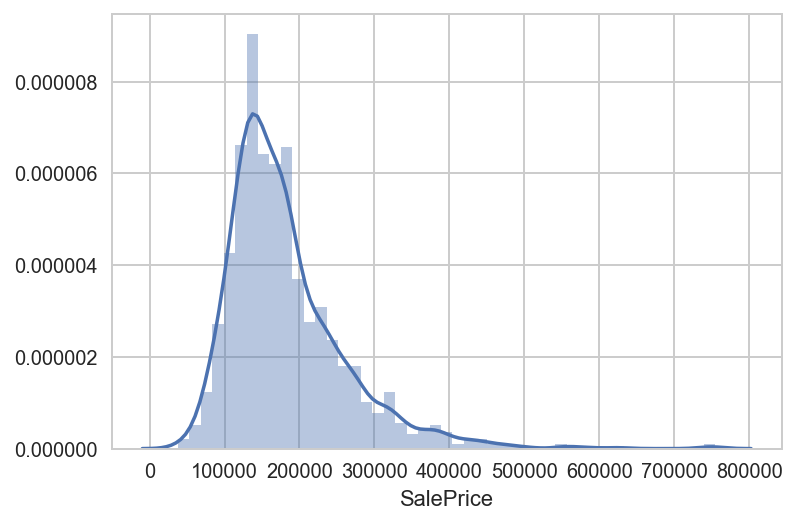

In [5]:
#To check if the price is Normally distributed
sns.distplot(house.SalePrice)
# ...and it is not that normally distribute...

In [8]:
# let try maybe the log saleprice would be more normall...
import math
house['LogPrice'] = house.SalePrice.map(math.log)

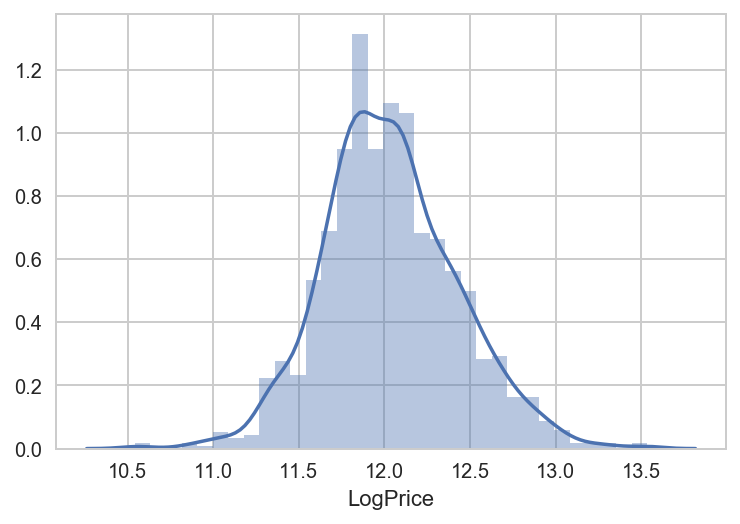

In [9]:
sns.distplot(house.LogPrice)
# That looks normal and this means we can hope that what's going on is the linear sum of a whole bunch
# of indepedent variables.

## EDA

Let's look at what we can and can't renovate, and numericalise the categorical 
data.

In [11]:
house.columns

Index([u'MSSubClass', u'MSZoning', u'LotFrontage', u'LotArea', u'Street',
       u'Alley', u'LotShape', u'LandContour', u'Utilities', u'LotConfig',
       u'LandSlope', u'Neighborhood', u'Condition1', u'Condition2',
       u'BldgType', u'HouseStyle', u'OverallQual', u'OverallCond',
       u'YearBuilt', u'YearRemodAdd', u'RoofStyle', u'RoofMatl',
       u'Exterior1st', u'Exterior2nd', u'MasVnrType', u'MasVnrArea',
       u'ExterQual', u'ExterCond', u'Foundation', u'BsmtQual', u'BsmtCond',
       u'BsmtExposure', u'BsmtFinType1', u'BsmtFinSF1', u'BsmtFinType2',
       u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF', u'Heating', u'HeatingQC',
       u'CentralAir', u'Electrical', u'1stFlrSF', u'2ndFlrSF', u'LowQualFinSF',
       u'GrLivArea', u'BsmtFullBath', u'BsmtHalfBath', u'FullBath',
       u'HalfBath', u'BedroomAbvGr', u'KitchenAbvGr', u'KitchenQual',
       u'TotRmsAbvGrd', u'Functional', u'Fireplaces', u'FireplaceQu',
       u'GarageType', u'GarageYrBlt', u'GarageFinish', u'GarageCars'

In [12]:
fixed_columns = ['MSSubClass', 'MSZoning',  'LotFrontage', u'LotArea', u'Street',
    u'Alley', u'LotShape', u'LandContour', u'Utilities', u'LotConfig',
    u'LandSlope', u'Neighborhood', u'Condition1', u'Condition2',
    u'BldgType', u'HouseStyle',u'YearBuilt',  u'Foundation', u'BsmtQual',
    u'Foundation', u'BsmtQual', '1stFlrSF',  u'2ndFlrSF', u'BsmtFullBath', 
    u'BsmtHalfBath', u'FullBath', u'HalfBath', u'BedroomAbvGr', u'KitchenAbvGr',
    u'TotRmsAbvGrd', u'GarageType', u'GarageYrBlt', u'GarageFinish', u'GarageCars',
    u'GarageArea', 'GrLivArea']
house[fixed_columns].dtypes

MSSubClass        int64
MSZoning         object
LotFrontage     float64
LotArea           int64
Street           object
Alley            object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
YearBuilt         int64
Foundation       object
BsmtQual         object
Foundation       object
BsmtQual         object
1stFlrSF          int64
2ndFlrSF          int64
BsmtFullBath      int64
BsmtHalfBath      int64
FullBath          int64
HalfBath          int64
BedroomAbvGr      int64
KitchenAbvGr      int64
TotRmsAbvGrd      int64
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageCars        int64
GarageArea        int64
GrLivArea         int64
dtype: object

In [13]:
house.LotFrontage.isnull().any()

True

In [14]:
house[house.LotFrontage.isnull()][fixed_columns]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GrLivArea
Id,,,,,,,,,,,,,,,,,,,,,
8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,1,3,1,7,Attchd,1973.0,RFn,2,484,2090
13,20,RL,NaN,12968,Pave,NaN,IR2,Lvl,AllPub,Inside,...,0,2,1,4,Detchd,1962.0,Unf,1,352,912
15,20,RL,NaN,10920,Pave,NaN,IR1,Lvl,AllPub,Corner,...,1,2,1,5,Attchd,1960.0,RFn,1,352,1253
32,20,RL,NaN,8544,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,1,3,1,6,Attchd,1966.0,Unf,1,271,1228
43,85,RL,NaN,9180,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,2,1,5,Attchd,1983.0,RFn,2,504,884
44,20,RL,NaN,9200,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,3,1,5,Detchd,1977.0,Unf,1,308,938
51,60,RL,NaN,13869,Pave,NaN,IR2,Lvl,AllPub,Corner,...,0,3,1,6,Attchd,1997.0,Fin,2,388,1470
65,60,RL,NaN,9375,Pave,NaN,Reg,Lvl,AllPub,Inside,...,1,3,1,8,Attchd,1998.0,RFn,2,645,2034
77,20,RL,NaN,8475,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,2,1,4,Detchd,1956.0,Unf,1,283,952


## Fixing up nulls in the lot frontage

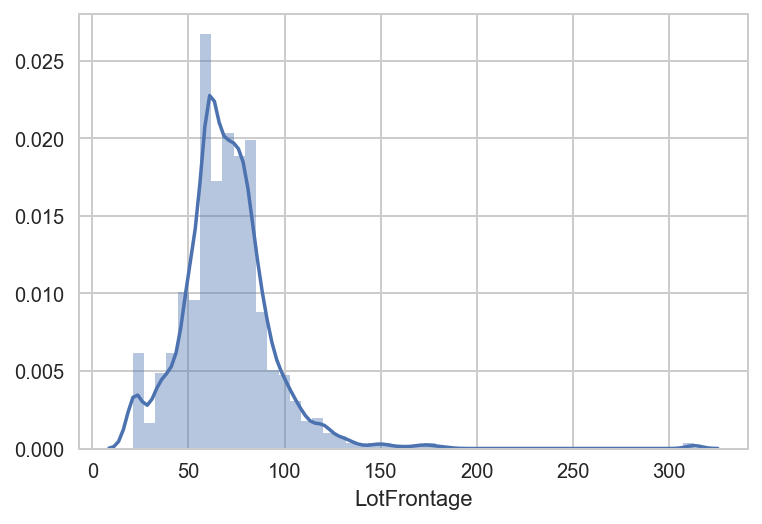

In [15]:
sns.distplot(house[house.LotFrontage.notnull()].LotFrontage)

In [16]:
house[house.LotFrontage.isnull()].LotShape.value_counts()

IR1    146
Reg     64
IR2     14
IR3      3
Name: LotShape, dtype: int64

In [17]:
import sklearn.neighbors
import sklearn.model_selection
frontage_imputer = sklearn.neighbors.KNeighborsRegressor()
imputer_data = house[house.LotFrontage.notnull()][['LotFrontage', 'LotShape', 'LotArea']]
imputer_data['LotShapeNum'] = imputer_data.LotShape.map(
    {'Reg' : 0,
    'IR1': 10000000,
    'IR2': 20000000,
    'IR3': 30000000}.get
)
imputer_data
(imptrain, imptest) = sklearn.model_selection.train_test_split(imputer_data, random_state=123)
frontage_imputer.fit(imptrain[['LotShapeNum', 'LotArea']], imptrain.LotFrontage)
frontage_imputer.score(imptest[['LotShapeNum', 'LotArea']], imptest.LotFrontage)

0.3556625978203718

In [18]:
import sklearn.dummy
frontage_dummy_imputer = sklearn.dummy.DummyRegressor()
frontage_dummy_imputer.fit(imptrain[['LotShapeNum', 'LotArea']], imptrain.LotFrontage)
frontage_dummy_imputer.score(imptest[['LotShapeNum', 'LotArea']], imptest.LotFrontage)

-0.0051291566830560242

In [19]:
missing_frontage_houses = house[house.LotFrontage.isnull()][['LotShape', 'LotArea']]
missing_frontage_houses['LotShapeNum'] = missing_frontage_houses.LotShape.map(
     {'Reg' : 0,
    'IR1': 10000000,
    'IR2': 20000000,
    'IR3': 30000000}.get
)
missing_frontage_houses
house.loc[house.LotFrontage.isnull(), 'LotFrontage'] = frontage_imputer.predict(
    missing_frontage_houses[['LotShapeNum', 'LotArea']])
house.LotFrontage.isnull().any()

False

In [20]:
house.GarageYrBlt.isnull().any()

True

In [21]:
house.loc[house.GarageYrBlt.isnull(), 'GarageYrBlt'] = house[house.GarageYrBlt.isnull()].YearBuilt
house.GarageYrBlt.isnull().any()

False

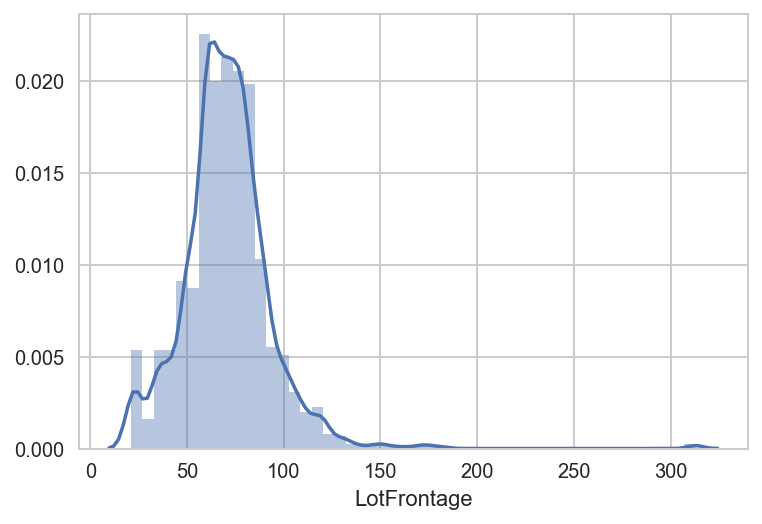

In [22]:
sns.distplot(house.LotFrontage)

In [23]:
categorical_columns = list(house[fixed_columns].select_dtypes(['object']).columns) + [
 "BedroomAbvGr", "FullBath", "HalfBath"   
]
to_unknown = { x : "Unknown" for x in categorical_columns}
house.fillna(to_unknown, inplace=True)
house

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LogPrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Unknown,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,12.247694
2,20,RL,80.0,9600,Pave,Unknown,Reg,Lvl,AllPub,FR2,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,12.109011
3,60,RL,68.0,11250,Pave,Unknown,IR1,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,12.317167
4,70,RL,60.0,9550,Pave,Unknown,IR1,Lvl,AllPub,Corner,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,11.849398
5,60,RL,84.0,14260,Pave,Unknown,IR1,Lvl,AllPub,FR2,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,12.429216
6,50,RL,85.0,14115,Pave,Unknown,IR1,Lvl,AllPub,Inside,...,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000,11.870600
7,20,RL,75.0,10084,Pave,Unknown,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,8,2007,WD,Normal,307000,12.634603
8,60,RL,91.2,10382,Pave,Unknown,IR1,Lvl,AllPub,Corner,...,NaN,NaN,Shed,350,11,2009,WD,Normal,200000,12.206073
9,50,RM,51.0,6120,Pave,Unknown,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900,11.774520


## Numericalising based on their weights



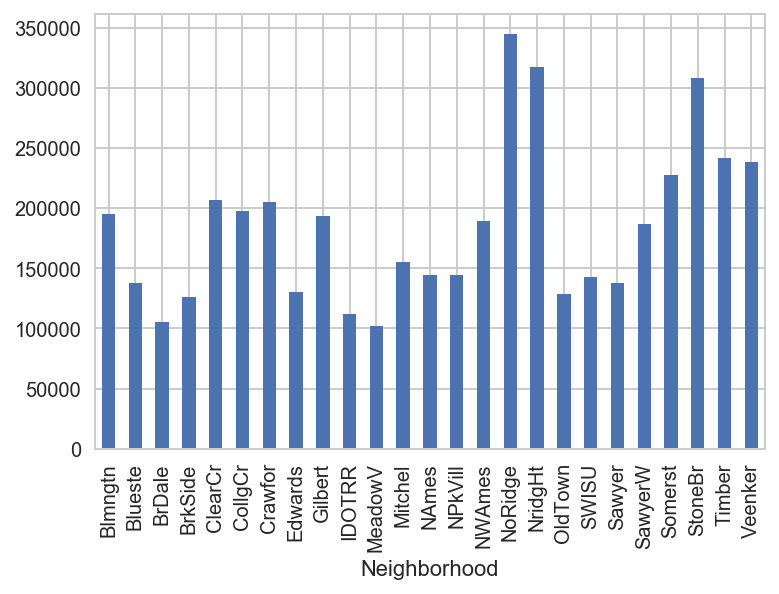

In [24]:
def plot_mean_by_something(column_name):
    house.groupby(column_name).SalePrice.mean().plot.bar()

plot_mean_by_something('Neighborhood')

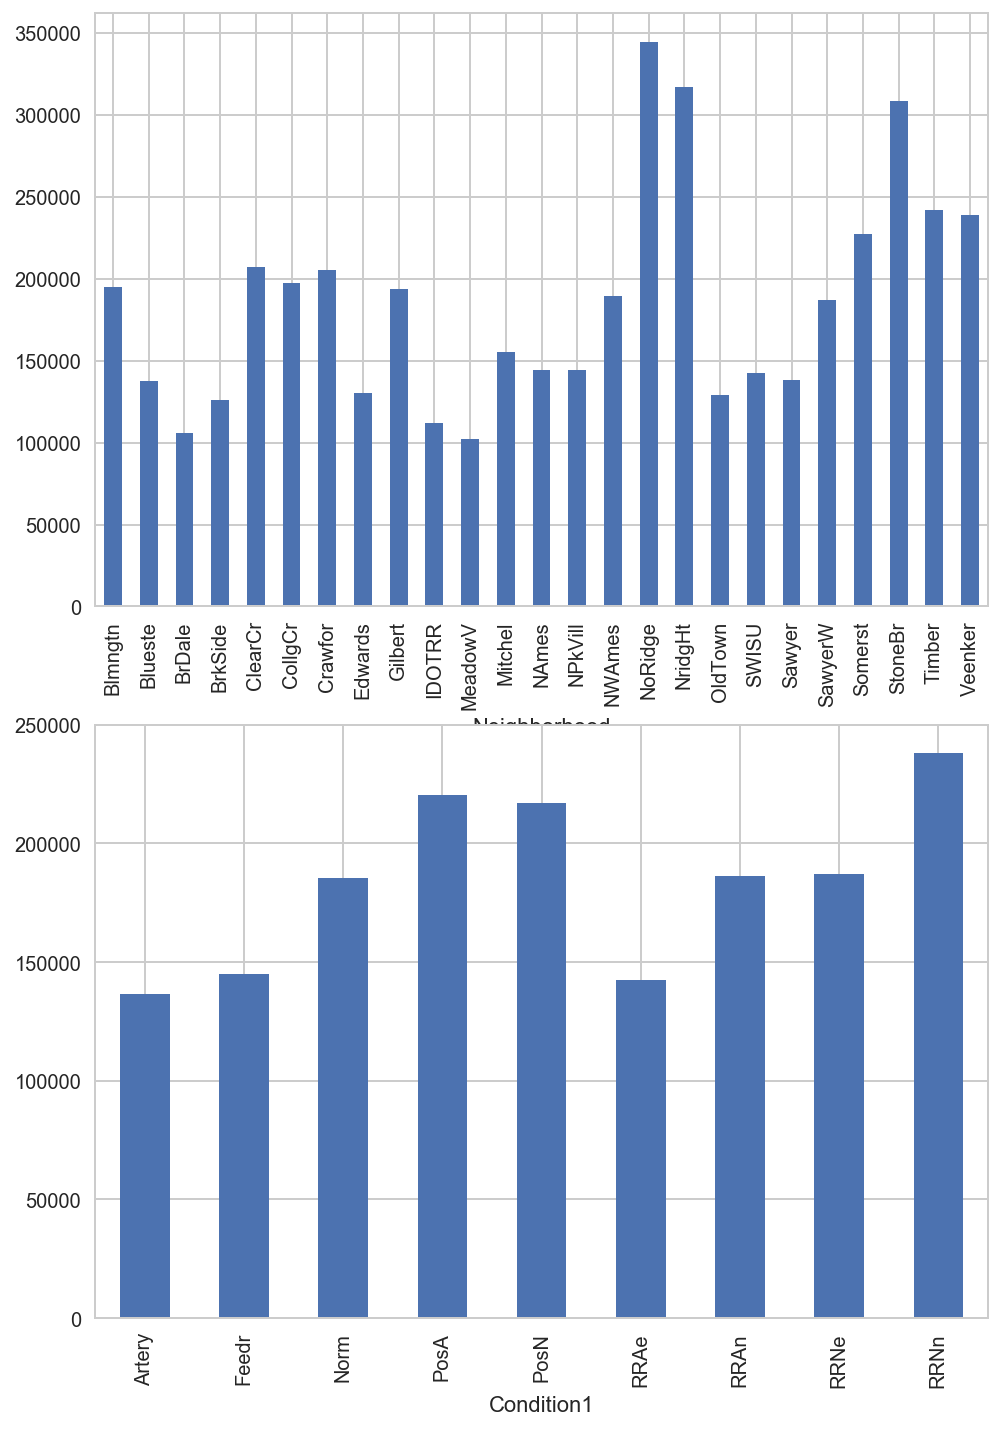

In [25]:
def plot_means(column_names):
    (fig, axes) = plt.subplots(nrows=len(column_names), figsize=(len(column_names) * 4,12))
    for i in range(len(column_names)):
        house.groupby(column_names[i]).SalePrice.mean().plot.bar(ax=axes[i])
        
plot_means(['Neighborhood', 'Condition1'])

--------------------------------------------------------------

In [26]:
numeriser_dict = {}
for column in categorical_columns:
    numeriser_dict[column] = house.groupby(column).LogPrice.mean().to_dict()
numeriser_dict

{'Alley': {'Grvl': 11.69278540668825,
  'Pave': 12.055550720428801,
  'Unknown': 12.045003536606902},
 'BedroomAbvGr': {0: 12.226990417033992,
  1: 11.894384324684694,
  2: 11.892448461098757,
  3: 12.057496012854124,
  4: 12.214480770302151,
  5: 11.984885303068806,
  6: 11.863325739179896,
  8: 12.206072645530174},
 'BldgType': {'1Fam': 12.054007123887578,
  '2fmCon': 11.764968152097021,
  'Duplex': 11.785997694212202,
  'Twnhs': 11.760215647316143,
  'TwnhsE': 12.082086759144071},
 'BsmtQual': {'Ex': 12.63474696567228,
  'Fa': 11.607793695100115,
  'Gd': 12.182881345013731,
  'TA': 11.818960981846532,
  'Unknown': 11.550294597718702},
 'Condition1': {'Artery': 11.74751335554185,
  'Feedr': 11.839833590021701,
  'Norm': 12.049928321694884,
  'PosA': 12.295228090062517,
  'PosN': 12.24552499094043,
  'RRAe': 11.85016407626064,
  'RRAn': 12.082736253366493,
  'RRNe': 12.138863895836725,
  'RRNn': 12.321807328411076},
 'Condition2': {'Artery': 11.570036037015239,
  'Feedr': 11.705994709

Why LogPrice? 

- I'm hoping that I can take linear sums of things to add up a logprice. (Because
  logprice appears to be normally distributed, and therefore the central limit theorem
  shold help).
  
Why make this dictionary?

- We have to have a function that we can apply to the test data set as well; but the
  only data we can use at that time is the train data set.

What does this numeriser do?

- It turns categorical columns into the mean of the category they are in

In [27]:
def numeriser(df):
    return df.replace(numeriser_dict)

numeric_house = numeriser(house)[fixed_columns]
numeric_house

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GrLivArea
Id,,,,,,,,,,,,,,,,,,,,,
1,60,12.088014,65.0,8450,12.032305,12.045004,11.946570,12.029974,12.032513,12.013812,...,12.202040,12.057496,1,8,12.164573,2003.0,12.181106,2,548,1710
2,20,12.088014,80.0,9600,12.032305,12.045004,11.946570,12.029974,12.032513,12.044239,...,11.932521,12.057496,1,6,12.164573,1976.0,12.181106,2,460,1262
3,60,12.088014,68.0,11250,12.032305,12.045004,12.164163,12.029974,12.032513,12.013812,...,12.202040,12.057496,1,6,12.164573,2001.0,12.181106,2,608,1786
4,70,12.088014,60.0,9550,12.032305,12.045004,12.164163,12.029974,12.032513,12.027751,...,11.932521,12.057496,1,7,11.779304,1998.0,11.828692,3,642,1717
5,60,12.088014,84.0,14260,12.032305,12.045004,12.164163,12.029974,12.032513,12.044239,...,12.202040,12.214481,1,9,12.164573,2000.0,12.181106,3,836,2198
6,50,12.088014,85.0,14115,12.032305,12.045004,12.164163,12.029974,12.032513,12.013812,...,12.202040,11.894384,1,5,12.164573,1993.0,11.828692,2,480,1362
7,20,12.088014,75.0,10084,12.032305,12.045004,11.946570,12.029974,12.032513,12.013812,...,11.932521,12.057496,1,7,12.164573,2004.0,12.181106,2,636,1694
8,60,12.088014,91.2,10382,12.032305,12.045004,12.164163,12.029974,12.032513,12.027751,...,12.202040,12.057496,1,7,12.164573,1973.0,12.181106,2,484,2090
9,50,11.703544,51.0,6120,12.032305,12.045004,11.946570,12.029974,12.032513,12.013812,...,11.932521,11.892448,2,8,11.779304,1931.0,11.828692,2,468,1774


In [28]:
# to check Nulls
numeric_house.isnull().any().any()

False

# Model test

In [29]:
import sklearn.linear_model
grid = sklearn.model_selection.GridSearchCV(
    sklearn.linear_model.Lasso(normalize=True),
    param_grid = {'alpha': np.arange(0.0001, 0.0010, 0.00001)
                 }
)
grid.fit(numeric_house, house.LogPrice)
grid.best_score_

0.81569231184240409

In [30]:
grid.best_params_

{'alpha': 0.0001}

In [31]:
house_test.loc[
    house_test.GarageYrBlt.isnull(), 'GarageYrBlt'
] = house_test[house_test.GarageYrBlt.isnull()].YearBuilt
house_test_needing_imputation = house_test[
    house_test.LotFrontage.isnull()
][['LotShape', 'LotArea']].copy()
house_test_needing_imputation['LotShapeNum'] = house_test_needing_imputation.LotShape.map(
     {'Reg' : 0,
    'IR1': 10000000,
    'IR2': 20000000,
    'IR3': 30000000}.get
)
house_test.loc[house_test.LotFrontage.isnull(), 'LotFrontage'] = frontage_imputer.predict(
    house_test_needing_imputation[['LotShapeNum', 'LotArea']]
)
house_test.fillna(to_unknown, inplace=True)
test_data = numeriser(house_test)
test_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
17,20,12.088014,74.0,11241,12.032305,12.045004,12.164163,12.029974,12.032513,12.243638,...,0,NaN,NaN,Shed,700,3,2010,WD,Normal,149000
25,20,12.088014,63.6,8246,12.032305,12.045004,12.164163,12.029974,12.032513,12.013812,...,0,NaN,MnPrv,NaN,0,5,2010,WD,Normal,154000
27,20,12.088014,60.0,7200,12.032305,12.045004,11.946570,12.029974,12.032513,12.027751,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,134800
28,20,12.088014,98.0,11478,12.032305,12.045004,11.946570,12.029974,12.032513,12.013812,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,306000
34,20,12.088014,70.0,10552,12.032305,12.045004,12.164163,12.029974,12.032513,12.013812,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,165500
39,20,12.088014,68.0,7922,12.032305,12.045004,11.946570,12.029974,12.032513,12.013812,...,0,NaN,NaN,NaN,0,1,2010,WD,Abnorml,109000
46,120,12.088014,61.0,7658,12.032305,12.045004,11.946570,12.029974,12.032513,12.013812,...,0,NaN,NaN,NaN,0,2,2010,WD,Normal,319900
53,90,11.703544,110.0,8472,12.053728,12.045004,12.313095,11.823432,12.032513,12.027751,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,110000
64,70,11.703544,50.0,10300,12.032305,12.045004,12.164163,11.823432,12.032513,12.013812,...,0,NaN,GdPrv,NaN,0,4,2010,WD,Normal,140000


In [32]:
test_data.dtypes

MSSubClass         int64
MSZoning         float64
LotFrontage      float64
LotArea            int64
Street           float64
Alley            float64
LotShape         float64
LandContour      float64
Utilities        float64
LotConfig        float64
LandSlope        float64
Neighborhood     float64
Condition1       float64
Condition2       float64
BldgType         float64
HouseStyle       float64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation       float64
BsmtQual         float64
                  ...   
BedroomAbvGr     float64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType       float64
GarageYrBlt      float64


In [33]:
house_test['LogPrice'] = house_test.SalePrice.map(math.log)

In [34]:
grid.best_estimator_.score(test_data[fixed_columns], house_test.LogPrice)

0.86834846559372669

In [35]:
prediction_price = np.exp(grid.best_estimator_.predict(test_data[fixed_columns]))

In [36]:
house_test['Residual'] = house_test.SalePrice - prediction_price

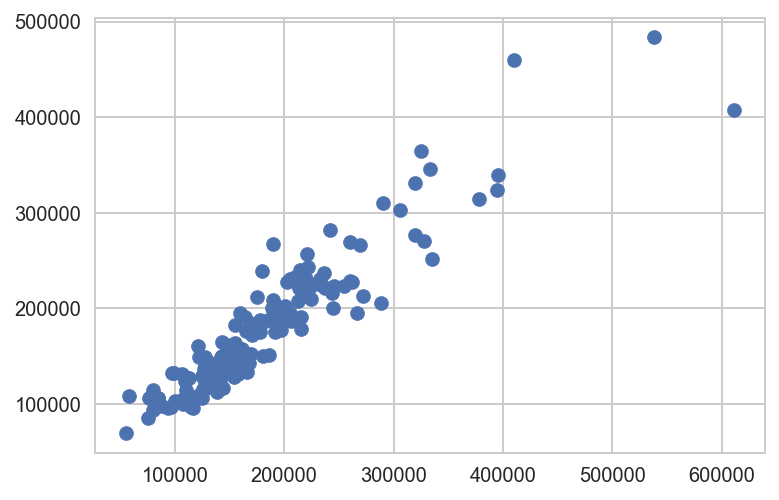

In [37]:
plt.scatter(house_test.SalePrice, prediction_price)

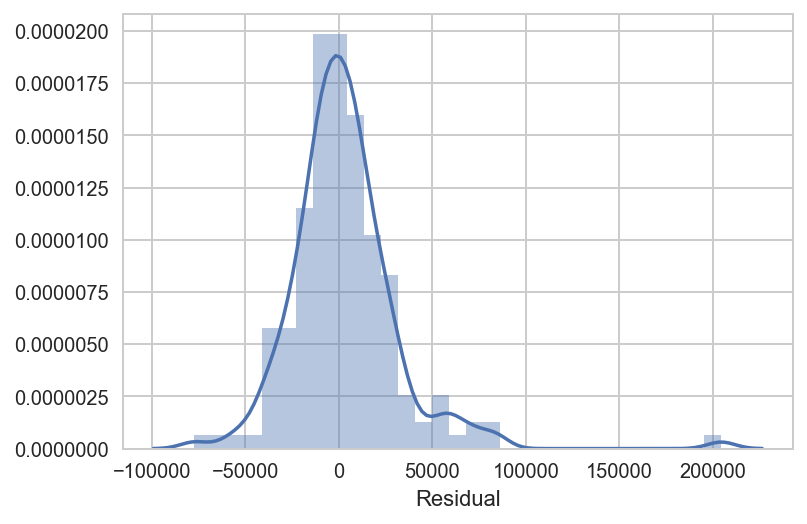

In [38]:
sns.distplot(house_test.Residual)

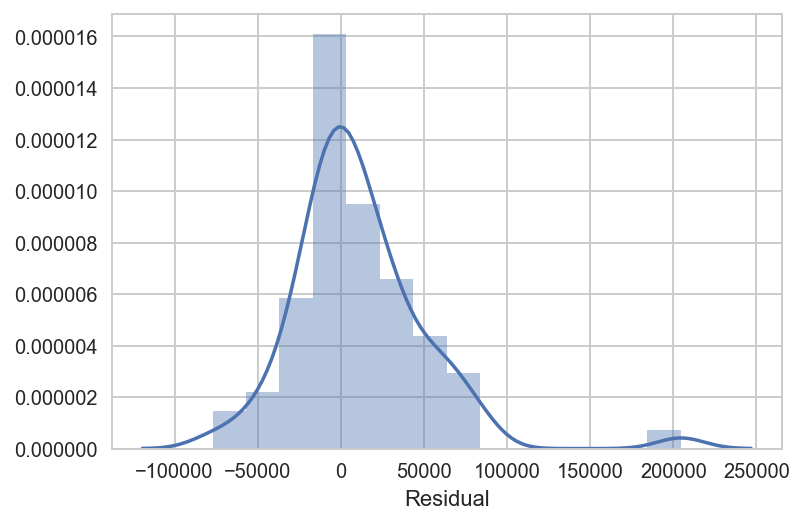

In [39]:
sns.distplot(house_test[house_test.SalePrice > house_test.SalePrice.mean()].Residual)


## 2. Determine any value of *changeable* property characteristics unexplained by the *fixed* ones.

In [40]:
changeable_columns = [x for x in house_test.columns if x not in fixed_columns 
                                     and x not in ['SalePrice', 'LogPrice',
                                                  'OverallCond', 'YrSold']]
changeable_house = house_test[changeable_columns].copy()
changeable_house

,OverallQual,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,Residual
Id,,,,,,,,,,,,,,,,,,,,,
17,6,1970,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,180.0,TA,TA,...,0,0,NaN,NaN,Shed,700,3,WD,Normal,5557.472572
25,5,2001,Gable,CompShg,Plywood,Plywood,None,0.0,TA,Gd,...,0,0,NaN,MnPrv,NaN,0,5,WD,Normal,26015.302202
27,5,2000,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,...,0,0,NaN,NaN,NaN,0,5,WD,Normal,10139.308546
28,8,2008,Gable,CompShg,VinylSd,VinylSd,Stone,200.0,Gd,TA,...,0,0,NaN,NaN,NaN,0,5,WD,Normal,2962.740460
34,5,1959,Hip,CompShg,BrkFace,BrkFace,None,0.0,TA,TA,...,0,0,NaN,NaN,NaN,0,4,WD,Normal,-10844.831439
39,5,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,...,0,0,NaN,NaN,NaN,0,1,WD,Abnorml,-14750.364308
46,9,2005,Hip,CompShg,MetalSd,MetalSd,BrkFace,412.0,Ex,TA,...,0,0,NaN,NaN,NaN,0,2,WD,Normal,42996.387187
53,5,1963,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Fa,TA,...,0,0,NaN,NaN,NaN,0,5,WD,Normal,-4950.224618
64,7,1950,Gable,CompShg,Stucco,Stucco,None,0.0,TA,TA,...,0,0,NaN,GdPrv,NaN,0,4,WD,Normal,6343.894533


In [41]:
changeable_house['MasVnrArea'].fillna(0, inplace=True)
changeable_house.fillna('Unknown', inplace=True)
changeable_house.isnull().any()

OverallQual      False
YearRemodAdd     False
RoofStyle        False
RoofMatl         False
Exterior1st      False
Exterior2nd      False
MasVnrType       False
MasVnrArea       False
ExterQual        False
ExterCond        False
BsmtCond         False
BsmtExposure     False
BsmtFinType1     False
BsmtFinSF1       False
BsmtFinType2     False
BsmtFinSF2       False
BsmtUnfSF        False
TotalBsmtSF      False
Heating          False
HeatingQC        False
CentralAir       False
Electrical       False
LowQualFinSF     False
KitchenQual      False
Functional       False
Fireplaces       False
FireplaceQu      False
GarageQual       False
GarageCond       False
PavedDrive       False
WoodDeckSF       False
OpenPorchSF      False
EnclosedPorch    False
3SsnPorch        False
ScreenPorch      False
PoolArea         False
PoolQC           False
Fence            False
MiscFeature      False
MiscVal          False
MoSold           False
SaleType         False
SaleCondition    False
Residual   

In [42]:
np.std(np.array([0,1,0,0]))

0.4330127018922193

In [43]:
changeable_categorical_columns = list(changeable_house.select_dtypes(['object']).columns) + [
    "MoSold"
]
numeriser_dict2 = {}
for column in changeable_categorical_columns:
    numeriser_dict2[column] = changeable_house.groupby(column).Residual.mean().to_dict()
numeriser_dict2

{'BsmtCond': {'Fa': -21293.82238180027,
  'Gd': 33426.253839068675,
  'TA': 3228.6750292000615,
  'Unknown': -9466.3938019415746},
 'BsmtExposure': {'Av': 6604.9207480328896,
  'Gd': 35595.100540590327,
  'Mn': 10742.575947234385,
  'No': -1460.7747445656082,
  'Unknown': -9466.3938019415746},
 'BsmtFinType1': {'ALQ': 4593.1597472216499,
  'BLQ': -579.85160413655103,
  'GLQ': 9166.8099264421289,
  'LwQ': -2404.9450769142845,
  'Rec': 2936.5235388193319,
  'Unf': -2549.6282105097312,
  'Unknown': -9466.3938019415746},
 'BsmtFinType2': {'ALQ': 6098.587196339703,
  'BLQ': -3882.6162555550086,
  'GLQ': -2835.9854783469877,
  'LwQ': -4676.4720169121465,
  'Rec': -4065.9275097067325,
  'Unf': 4401.5570570941982,
  'Unknown': -9466.3938019415746},
 'CentralAir': {'N': -13017.858446559259, 'Y': 3944.8184538820974},
 'Electrical': {'FuseA': 326.54194583293946,
  'FuseF': -35645.690790597568,
  'SBrkr': 3545.322656586945},
 'ExterCond': {'Fa': -16675.563958891929,
  'Gd': 12832.323762602744,
  '

In [44]:
changeable_house_numeric = changeable_house.replace(numeriser_dict2)
changeable_house_numeric

,OverallQual,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,Residual
Id,,,,,,,,,,,,,,,,,,,,,
17,6,1970,75.674157,3039.875631,-3375.650783,1264.177547,-957.836828,180.0,1129.324634,2302.634601,...,0,0,2958.616309,1276.104273,11802.450034,700,12281.124980,1059.598111,2132.540085,5557.472572
25,5,2001,75.674157,3039.875631,-4489.267070,-2987.073903,1495.490710,0.0,1129.324634,12832.323763,...,0,0,2958.616309,4738.797767,2403.318924,0,4571.875557,1059.598111,2132.540085,26015.302202
27,5,2000,75.674157,3039.875631,-3375.650783,1264.177547,1495.490710,0.0,1129.324634,2302.634601,...,0,0,2958.616309,1276.104273,2403.318924,0,4571.875557,1059.598111,2132.540085,10139.308546
28,8,2008,75.674157,3039.875631,4846.254320,6835.648130,25352.230709,200.0,-1290.905902,2302.634601,...,0,0,2958.616309,1276.104273,2403.318924,0,4571.875557,1059.598111,2132.540085,2962.740460
34,5,1959,15489.529932,3039.875631,27675.520181,8491.718655,1495.490710,0.0,1129.324634,2302.634601,...,0,0,2958.616309,1276.104273,2403.318924,0,4917.775269,1059.598111,2132.540085,-10844.831439
39,5,2007,75.674157,3039.875631,4846.254320,6835.648130,1495.490710,0.0,1129.324634,12832.323763,...,0,0,2958.616309,1276.104273,2403.318924,0,-5072.833038,1059.598111,-11588.086313,-14750.364308
46,9,2005,15489.529932,3039.875631,4781.559136,3013.439632,-957.836828,412.0,67211.343799,2302.634601,...,0,0,2958.616309,1276.104273,2403.318924,0,5671.300458,1059.598111,2132.540085,42996.387187
53,5,1963,75.674157,3039.875631,-3375.650783,1264.177547,1495.490710,0.0,-9912.664478,2302.634601,...,0,0,2958.616309,1276.104273,2403.318924,0,4571.875557,1059.598111,2132.540085,-4950.224618
64,7,1950,75.674157,3039.875631,6773.003423,-21650.681734,1495.490710,0.0,1129.324634,2302.634601,...,0,0,2958.616309,14911.069470,2403.318924,0,4917.775269,1059.598111,2132.540085,6343.894533


## Prediction time....

What if we only considered expensive houses?

In [45]:
#changeable_house_numeric = changeable_house_numeric[house_test.SalePrice > 300000]

In [46]:
residual = changeable_house_numeric.Residual
del changeable_house_numeric['Residual']

In [47]:
grid2 = sklearn.model_selection.GridSearchCV(
    sklearn.linear_model.Lasso(),
    param_grid = { 'alpha' : np.logspace(-10, 10, 100),
                   'normalize': [True]}
)
grid2.fit(changeable_house_numeric, residual)

/anaconda/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


GridSearchCV(cv=None, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'normalize': [True], 'alpha': array([  1.00000e-10,   1.59228e-10, ...,   6.28029e+09,   1.00000e+10])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [48]:
grid2.best_params_

{'alpha': 210.49041445120218, 'normalize': True}

In [49]:
grid2.best_score_

0.31720649869669199

In [50]:
feature_values = pd.DataFrame(
    {'coefname' : changeable_house_numeric.columns,
     'strength' : grid2.best_estimator_.coef_
    }
)
feature_values.sort_values('strength', ascending=False)

,coefname,strength
13,BsmtFinSF1,6.650492
39,MiscVal,5.218351
34,ScreenPorch,1.073140
37,Fence,0.565458
23,KitchenQual,0.564781
24,Functional,0.544963
11,BsmtExposure,0.332117
40,MoSold,0.262330
8,ExterQual,0.228165
6,MasVnrType,0.211860


Suggestions:

- Work on the basement, make sure that it's as good as possible

- Work on the screened-in veranda area (porch)

- Work on the fence

- Improve the kitchen

For expensive houses, the year of remod makes a big difference